In [1]:
#importation des bibliothèques

from astropy.io import fits
from astropy.visualization import ZScaleInterval

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from matplotlib import image
from scipy.signal import find_peaks
from scipy.signal import savgol_filter

import numpy as np
from math import pi, tan, atan, floor

print("librairies importés")

librairies importés


In [2]:
#importation de l'image: Taper l'adresse de l'image
'''Veuillez taper ici l'adresse de l'image FIT à analyser '''
hdul = fits.open('OMEGA.2020-03-14T00%3A27%3A16.076_fullfield_binned.fits')
data = hdul[1].data

#ZScale
s = ZScaleInterval()
z1,z2 = s.get_limits(data)
img = data[::-1]
img[img > z2] = z2
img[img < z1] = z1

#Decoupage en blocs
length,width=img.shape
x_adresses,y_adresses=[0],[0]

for j in range(0,width-1):
    if img[0][j]>0 and not(img[0][j+1]>0):
        x_adresses+=[j]
    if not(img[0][j]>0) and img[0][j+1]>0:
        x_adresses+=[j]
x_adresses+=[width-1]

for j in range(0,length-1):
    if img[j][0]>0 and not(img[j+1][0]>0):
        y_adresses+=[j]
    if not(img[j][0]>0) and img[j+1][0]>0:
        y_adresses+=[j]
y_adresses+=[length-1]

'''Decouper le grand bloc au milieu en deux afin que tous les blocs aient la meme taille'''

y_adresses_bis=[]
for i in range(len(y_adresses)):
    if i!=len(y_adresses)//2:
        y_adresses_bis+=[y_adresses[i]]
    else:
        y_adresses_bis+=[(y_adresses[i-1]+y_adresses[i])//2]
        y_adresses_bis+=[(y_adresses[i-1]+y_adresses[i])//2]
        y_adresses_bis+=[y_adresses[i]]

        
couple_x,couple_y=[],[]
for i in range(0,len(x_adresses)//2):
    couple_x+=[[x_adresses[2*i],x_adresses[2*i+1]]]
    
for i in range(0,len(y_adresses_bis)//2):
    couple_y+=[[y_adresses_bis[2*i],y_adresses_bis[2*i+1]]]

blocs_adresses = [[x,y] for x in couple_x for y in couple_y]
''' On dispose maitenant d'une liste blocs_adresses avec tous les coordonnées qui limitent chaque bloc '''


" On dispose maitenant d'une liste blocs_adresses avec tous les coordonnées qui limitent chaque bloc "

La taille du bloc à analyser est 4036 x 2034


'Voici le bloc à analyser'

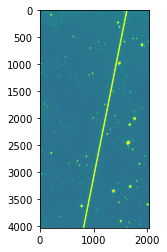

In [3]:
#Choix du bloc à analyser
'''On dispose maintenant de 32 blocs. Le choix du bloc à analyser se fait en choisissant un nombre nulber_bloc variant de 0 à 31'''
number_bloc=2
xliminf=blocs_adresses[number_bloc][0][0]
xlimsup=blocs_adresses[number_bloc][0][1]
yliminf=blocs_adresses[number_bloc][1][0]
ylimsup=blocs_adresses[number_bloc][1][1]
crop = img[yliminf:ylimsup,xliminf:xlimsup]
plt.imshow(crop)

MatrixImage=crop

height=len(MatrixImage)
width=len(MatrixImage[0])

print("La taille du bloc à analyser est",height,"x",width)

'''Voici le bloc à analyser'''

In [4]:
#calculate the brightness of the pixel i,j
def brightness_case(i,j):
    return MatrixImage[i][j]

#Determiner les pics de luminosité
'''D'après les analyses et les mesures expérimentales qu'on a faites, on doit choisir une prominence minimale de 5'''
'''On choisit aussi une largeur à mi-hauteur entre 20 et 200 pixels'''

def peak_detection(liste,prom=5,wid=[20,200]):
    x=np.array(liste)
    mean_list=np.mean(x)


    peaks, properties = find_peaks(x, prominence=prom, width=wid)
    plt.plot(x)
    plt.plot(peaks, x[peaks], "x",color = "red")
    plt.vlines(x=peaks, ymin=x[peaks] - properties["prominences"],
               ymax = x[peaks], color = "red")
    plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],
               xmax=properties["right_ips"], color = "red")
    plt.plot(np.zeros_like(x)+mean_list, "--", color="gray")

    plt.xlabel("Intersection with the Y-Axis")
    plt.ylabel("Median brightness")
    plt.grid(True)

    if len(peaks)>0:

        #plt.show()

        return [True,peaks,properties]
    else:
        return [False]



Le processus traite maintenant le cas de la direction alpha= 1
Le processus traite maintenant le cas de la direction alpha= 2
Le processus traite maintenant le cas de la direction alpha= 3
Le processus traite maintenant le cas de la direction alpha= 4
Le processus traite maintenant le cas de la direction alpha= 5
Le processus traite maintenant le cas de la direction alpha= 6
Le processus traite maintenant le cas de la direction alpha= 7
Le processus traite maintenant le cas de la direction alpha= 8
Le processus traite maintenant le cas de la direction alpha= 9
Le processus traite maintenant le cas de la direction alpha= 10
Le processus traite maintenant le cas de la direction alpha= 11
Le processus traite maintenant le cas de la direction alpha= 12
Le processus traite maintenant le cas de la direction alpha= 13
Le processus traite maintenant le cas de la direction alpha= 14
Le processus traite maintenant le cas de la direction alpha= 15
Le processus traite maintenant le cas de la direc

/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 32
Le processus traite maintenant le cas de la direction alpha= 33
Le processus traite maintenant le cas de la direction alpha= 34
Le processus traite maintenant le cas de la direction alpha= 35


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 36
Le processus traite maintenant le cas de la direction alpha= 37
Le processus traite maintenant le cas de la direction alpha= 38


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 39


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 40
Le processus traite maintenant le cas de la direction alpha= 41


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 42


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 43


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 44


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 45


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 46


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 47


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 48


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 49


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 50


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 51


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 52


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 53


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 54


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 55


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 56


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 57


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 58


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 59


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 60


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 61


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 62


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 63


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 64


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 65


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 66


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 67


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 68


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 69


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 70


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 71


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 72


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 73


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 74


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 75


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 76


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 77


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 78


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 79


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 80


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 81


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 82


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 83


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 84


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 85


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 86


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 87


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Le processus traite maintenant le cas de la direction alpha= 88


/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


runtime : 87.0 minutes 37.581015825271606 secondes
Le processus détecte 4 satellites dans le bloc 2
[['angle', 33, 'Ordonnee', 3961.1049554362635, 'prominence', 6.035467354674722, 'width', 22.015138047765504], ['angle', 34, 'Ordonnee', 3960.049676742504, 'prominence', 6.0116152396571465, 'width', 23.04656618435365], ['angle', 78, 'Ordonnee', -3711.2176426791702, 'prominence', 59.834981687697166, 'width', 171.70706136843637], ['angle', 79, 'Ordonnee', -4161.022868483606, 'prominence', 97.44492805768323, 'width', 148.56843312499223]]


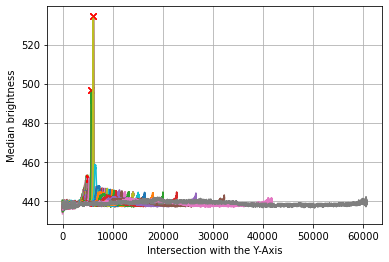

In [5]:
import time
start_time = time.time()    # used to compute the script total runtime


#Projection nd detection of brightness peaks
'''On étudie toutes les directions entre alpha_min et alpha_max'''
alpha_min=1
alpha_max=89


satellites_detected=[]
'''Cette liste contiendra après toutes les infos sur les satellites détectés'''

for i in range(alpha_min,alpha_max):
    alpha=i*pi/180
    print("Le processus traite maintenant le cas de la direction alpha=",i)
    list_constant,list_brightness, list_brightness_moy,list_brightness_median,list_brightness_q75=[],[],[],[],[]

    for constant in range(-int(floor(width*tan(alpha)))+1,height-1):
        brightness,brightness2,nb_of_pixel,nb_of_pixel2=0,0,0,0
        liste_all,list_all_median=[],[]

        for j in range(1,width-1):
            if (j*tan(alpha)+constant)>0 and  (j*tan(alpha)+constant)<height:
                nb_of_pixel+=1
                lum=brightness_case(height-1-int(floor(j*tan(alpha)+constant)),j)
                brightness+=lum
                liste_all+=[lum]

        a=np.mean(liste_all)
        b=np.median(liste_all)
        ecart=(np.var(liste_all))**0.5


        for j in range(1,width-1):
            if (j*tan(alpha)+constant)>0 and  (j*tan(alpha)+constant)<height:
                lum=brightness_case(height-1-int(floor(j*tan(alpha)+constant)),j)
                if abs(lum-b)<4*ecart:
                    nb_of_pixel2+=1
                    brightness2+=lum
                    list_all_median+=[lum]

        if nb_of_pixel2>=4:
            list_brightness+=[brightness2]
            list_brightness_moy+=[brightness2/nb_of_pixel2]
            list_brightness_q75+=[np.quantile(list_all_median,0.75)]
            list_brightness_median+=[np.median(list_all_median)]
            list_constant+=[constant]


    '''on enlève les parties à droite et à gauche là ou il'y des pics inutiles'''
    
    nb=len(list_brightness_moy)
    list_brightness_moy=list_brightness_moy[nb//100 : nb-nb//100]
    list_brightness_median=list_brightness_median[nb//100 : nb-nb//100]
    list_brightness_q75=list_brightness_q75[nb//100 : nb-nb//100]

    #decalage dans les ordonnées
    decalage=-width*tan(alpha)+(width*tan(alpha)+height)//100
    

    '''On purifie le signal'''
    list_brightness_median= savgol_filter(list_brightness_median, 31, 3)
    
    

    if peak_detection(list_brightness_median)[0]==True:
        for j in range(0,len(peak_detection(list_brightness_median)[1])):
            satellites_detected+=[["angle",i,"Ordonnee",peak_detection(list_brightness_median)[1][j]+decalage,"prominence",peak_detection(list_brightness_median)[2].get("prominences")[j],"width",peak_detection(list_brightness_median)[2].get("right_ips")[j]-peak_detection(list_brightness_median)[2].get("left_ips")[j]]]

#prints the total runtime
print('runtime :', (time.time() - start_time)//60, 'minutes',(time.time() - start_time)%60,"secondes") 

#prints the results
print('Le processus détecte', len(satellites_detected), 'satellites dans le bloc',number_bloc)
print(satellites_detected)

[33, 34, 78, 79] [3961.1049554362635, 3960.049676742504, -3711.2176426791702, -4161.022868483606]


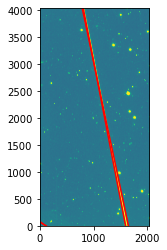

In [6]:
#Traçage du satellite detecté

angles=[]
ordonnee=[]
for item in satellites_detected:
    angles+=[item[1]]
    ordonnee+=[item[3]]

print(angles,ordonnee)

plt.imshow(MatrixImage)

abscisse=[]
for x in range(0,width):
    abscisse+=[x]

for i in range(len(angles)):
    droite=[]
    for x in range(0,width):
        droite+=[height-x*tan(angles[i]*pi/180)-ordonnee[i]]
    plt.plot(abscisse,droite,'r')
    plt.ylim(0,height)

plt.show()
